### 2.2.1 Tensor 

In [1]:
import torch as t

创建 5*3 矩阵，只是分配的空间，并未初始化

In [2]:
x = t.Tensor(5, 3)
x

tensor([[-4.4513e+14,  4.5807e-41, -4.4513e+14],
        [ 4.5807e-41,  1.1720e-19,  1.5637e-01],
        [ 1.8475e+20,  6.2642e-10,  7.5570e+28],
        [ 7.7140e+31,  1.1703e-19,  5.8253e-10],
        [ 1.0314e-08,  1.7377e-04,  2.7449e-06]])

[0, 1]均匀分布初始化二维数组

In [3]:
x = t.rand(5, 3)
x

tensor([[0.0754, 0.3617, 0.5647],
        [0.2842, 0.9946, 0.5640],
        [0.3326, 0.5789, 0.4824],
        [0.6585, 0.2376, 0.8198],
        [0.3205, 0.1487, 0.4831]])

形状，后边两种方式等价 torch.Size 是 tuple 的子类

In [4]:
x.size()

torch.Size([5, 3])

In [5]:
x.size()[0]

5

In [6]:
x.size(1)

3

矩阵加法

In [7]:
y = t.rand(5,3)
y

tensor([[0.4101, 0.3734, 0.0994],
        [0.4131, 0.8546, 0.9011],
        [0.4878, 0.1437, 0.2895],
        [0.9773, 0.6522, 0.2929],
        [0.5299, 0.2678, 0.6796]])

第一种写法

In [8]:
x + y

tensor([[0.4855, 0.7352, 0.6641],
        [0.6973, 1.8491, 1.4651],
        [0.8204, 0.7225, 0.7719],
        [1.6358, 0.8898, 1.1127],
        [0.8505, 0.4165, 1.1627]])

第二种写法

In [9]:
t.add(x, y)

tensor([[0.4855, 0.7352, 0.6641],
        [0.6973, 1.8491, 1.4651],
        [0.8204, 0.7225, 0.7719],
        [1.6358, 0.8898, 1.1127],
        [0.8505, 0.4165, 1.1627]])

第三种写法

In [10]:
# 预先分配空间
result = t.Tensor(5,3)
# 输入到 result
t.add(x, y, out=result)
result

tensor([[0.4855, 0.7352, 0.6641],
        [0.6973, 1.8491, 1.4651],
        [0.8204, 0.7225, 0.7719],
        [1.6358, 0.8898, 1.1127],
        [0.8505, 0.4165, 1.1627]])

注意：

函数名后边带下划线 _ 会修改 Tensor 本身 

例如 x.add_(y) x.t_() 会改变x, 不加下划线会返回新的 Tensor

In [11]:
x[:, 1]  # x 的第二列

tensor([0.3617, 0.9946, 0.5789, 0.2376, 0.1487])

In [12]:
a = t.ones(5)
a 

tensor([1., 1., 1., 1., 1.])

In [13]:
b = a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [14]:
import numpy as np
a = np.ones(5)
b = t.from_numpy(a)  # Numpy -> Tensor
print(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


注意：

Tensor 和 numpy 对象共享内存，所以他们之间的转换很快，

其中一个变了，另外一个也会变

In [15]:
b.add_(1)  # 以 _ 结尾的会改变自身
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


可以通过 .cuda 方法转为 GPU 的 Tensor

In [16]:
x = t.rand(5, 3)
x

tensor([[0.7201, 0.6175, 0.2877],
        [0.3712, 0.5115, 0.6367],
        [0.0670, 0.2443, 0.1388],
        [0.1620, 0.0493, 0.9795],
        [0.2458, 0.4653, 0.2404]])

In [17]:
y = t.rand(5, 3)
y

tensor([[0.3443, 0.2214, 0.4452],
        [0.2537, 0.1683, 0.3653],
        [0.1088, 0.6180, 0.8529],
        [0.8222, 0.0352, 0.8171],
        [0.9527, 0.4431, 0.9198]])

In [18]:
if t.cuda.is_available():
    x = x.cuda()
    y = y.cuda()
    x + y

In [20]:
y

tensor([[0.3443, 0.2214, 0.4452],
        [0.2537, 0.1683, 0.3653],
        [0.1088, 0.6180, 0.8529],
        [0.8222, 0.0352, 0.8171],
        [0.9527, 0.4431, 0.9198]], device='cuda:0')

### 2.2.2 Autograd: 自动微分

auto.grad.Variable 是 Autograd 中的核心类， 简单封装了 Tensor

通过调用 .backward 实现反向传播,自动计算所有梯度

auto.grad.Variable 包含三个属性
* data: 保存 Variable 所包含的 Tensor
* grad: 保存 data 对应的梯度，也是个 Variable ，和 data 形状一样
* grad_fn: 指向一个 Function 对象，用来反向传播计算输入梯度

In [21]:
from torch.autograd import Variable

In [22]:
x = Variable(t.ones(2,2), requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [23]:
y = x.sum()
y

tensor(4., grad_fn=<SumBackward0>)

In [24]:
y.grad_fn

In [25]:
y.backward()  # 反向传播，计算梯度

In [26]:
# y = x.sum() = (x[0][0] + x[0][1] + x[1][0] + x[1][1])
# 每个值的梯度都为 1
x.grad

tensor([[1., 1.],
        [1., 1.]])

注意： 

grad 在反向传播过程中是累加的 (accumulated)，每次运行反向传播，

梯度都会累加之前的梯度。所以反向传播之前需把梯度清零。

In [27]:
y.backward()
x.grad

tensor([[2., 2.],
        [2., 2.]])

In [28]:
y.backward()
x.grad

tensor([[3., 3.],
        [3., 3.]])

In [29]:
x.grad.data.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [30]:
y.backward()
x.grad

tensor([[1., 1.],
        [1., 1.]])

Variable 和 Tensor 具有近乎一致的接口

In [31]:
x = Variable(t.ones(4,5))
y = t.cos(x)
x_tensor_cos = t.cos(x.data)
print(y)
x_tensor_cos

tensor([[0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403]])


tensor([[0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403],
        [0.5403, 0.5403, 0.5403, 0.5403, 0.5403]])

### 2.2.3 神经网络

**定义网络**

需要继承 nn.Module，并实现它的 forward 方法；

把网络中具有可学习参数的层放在构造函数 `__init__` 中

In [34]:
import torch.nn as nn
import torch.nn.functional as F

In [35]:
class Net(nn.Module):
    def __init__(self):
        # nn.Module 子类的函数必须在构造函数中执行父类的构造函数
        # 等价于 nn.Module.__init__(self)
        super(Net, self).__init__()
        
        # 卷基层‘1’不爱上古手工艺人员图片为单通道，‘6’表示输出通道数
        # ‘5’表示卷积核为 5*5
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 仿射层 / 全连接层， y = Wx + b
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
        
    def forward(self, x):
        # 卷积 -> 激活 -> 池化
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # reshape, '-1' 表示自适应
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


网络的可学习参数通过 `net.parameters()` 返回，

`net.named_parameters` 可同时返回可学习参数及名称

In [36]:
params = list(net.parameters())
print(len(params))

10


In [41]:
for name, parameters in net.named_parameters():
    print(name, ':', parameters.size())

conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


forward 函数的输入和输出都是 Varibale, 只有Variable才具有自动求导功能

Tensor 没有，所以输入时，需要把 Tensor 封装成 Varibale

In [51]:
input_ = Variable(t.randn(1, 1, 32, 32))
out = net(input_)
out.size()

torch.Size([1, 10])

In [52]:
net.zero_grad()  # 所有参数的梯度清零
out.backward(Variable(t.ones(1,10)))  # 反向传播

注意：

torch.nn 只支持 mini-batches ，不支持一次只输入一个样本，

即一次必须是一个 batch 

如果只想输入一个样本，用 `input.unsequeeze(0)` 将 batch_size 设置为 1

例如： nn.Conv2d 输入必须是4维的， nSamples × nChannels × Height × Width

可将 nSample 设为1，即 1 × nChannels × Height × Width

**损失函数**

In [75]:
output = net(input_)
target = Variable(t.arange(0, 10)).float()  # 默认 long 与书中不同
criterion = nn.MSELoss()
loss = criterion(output, target)
loss

tensor(28.9635, grad_fn=<MseLossBackward>)

In [76]:
# 运行 .backward， 观察调用之前和调用之后的 grad
net.zero_grad()  # 把 net 中所有可学习参数的梯度清零
print('反向传播之前 conv1.bias 的梯度')
print(net.conv1.bias.grad)
loss.backward()
print('反向传播之后 conv1.bias 的梯度')
print(net.conv1.bias.grad)

反向传播之前 conv1.bias 的梯度
tensor([0., 0., 0., 0., 0., 0.])
反向传播之后 conv1.bias 的梯度
tensor([-0.0121, -0.0093,  0.0182, -0.0855,  0.0168,  0.0907])


**优化器**

SGD

`weight = weight - learning_rate * gradient`

In [77]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)  # inplace减法

In [78]:
f.data

tensor([-0.0309,  0.0791, -0.0606,  0.0954, -0.0361,  0.0411, -0.0813, -0.0879,
        -0.0622, -0.0866])

In [79]:
import torch.optim as optim

In [80]:
# 新建一个优化器，指定要调整的参数和学习率
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 在训练过程中
# 先梯度清零（与 net.zero_grad() 效果一样）
optimizer.zero_grad()

# 计算损失
output = net(input_)
loss = criterion(output, target)

# 反向传播
loss.backward()

# 更新参数
optimizer.step()

### 2.2.4 小试牛刀：CIFAR-10 分类

In [83]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage()  # 可以把 Tensor 转成 Image，方便可视化

In [88]:
# 定义对数据的预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 转为 Tensor
    # 归一化
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 训练集
trainset = tv.datasets.CIFAR10(
    root='../data',
    train=True,
    download=True,
    transform=transform
)
trainloader = t.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

# 测试集
testset = tv.datasets.CIFAR10(
    root='../data',
    train=False,
    download=True,
    transform=transform
)
testloader = t.utils.data.DataLoader(
    testset, 
    batch_size=4,
    shuffle=False,
    num_workers=2
)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


ship


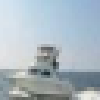

In [89]:
(data, label) = trainset[100]
print(classes[label])

# (data + 1) / 2 是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

       bird         dog         dog         cat


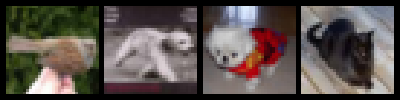

In [90]:
dataiter = iter(trainloader)
images, labels = dataiter.next()  # 返回 4 张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

**定义网络**

In [91]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 此处改为 3
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


**定义损失函数和优化器**

In [93]:
from torch import optim
criterion = nn.CrossEntropyLoss()  # 交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

**训练网络**

In [95]:
for epoch in range(2):
    
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        
        # 输入数据
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        # 梯度清零
        optimizer.zero_grad()
        
        # forward + backward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        # 更新参数
        optimizer.step()
        
        # 打印 log 信息
        running_loss += loss.data  # 去掉书中的 [0]
        if i % 2000 == 1999:  # 每 2000 个 batch 打印一次训练状态
            print('[%d, %5d] loss: %.3f' \
                 % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')


[1,  2000] loss: 2.205
[1,  4000] loss: 1.927
[1,  6000] loss: 1.720
[1,  8000] loss: 1.588
[1, 10000] loss: 1.512
[1, 12000] loss: 1.461
[2,  2000] loss: 1.387
[2,  4000] loss: 1.377
[2,  6000] loss: 1.341
[2,  8000] loss: 1.321
[2, 10000] loss: 1.322
[2, 12000] loss: 1.310
Finished Training


实际的label：      cat     ship     ship    plane


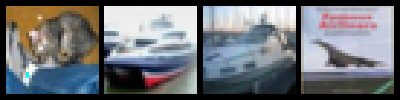

In [98]:
dataiter = iter(testloader)
images, labels = dataiter.next()  # 一个 batch 返回 4 张图片
print('实际的label：', ' '.join(\
                           '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400, 100))

In [99]:
# 计算图片在每个类别上的分数
outputs = net(Variable(images))
# 得分最高的那个类
_, predicted = t.max(outputs.data, 1)

print('预测结果：', ' '.join('%5s'\
                       % classes[predicted[j]] for j in range(4)))

预测结果：   cat  ship   car  ship


In [101]:
correct = 0  # 预测正确的图片数
total = 0  # 总共的图片数
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('10000张测试集中的准确率为： %d %%' % (100 * correct / total))

10000张测试集中的准确率为： 52 %


**在 GPU 上训练**

In [102]:
if t.cuda.is_available():
    net.cuda()
    images = images.cuda()
    labels = labels.cuda()
    output = net(Variable(images))
    loss = criterion(output, Variable(labels))